In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#one-hot word vectors              word embeddings

#Sparse                           #Dense
#High-dimensional                 #Low-dimensional
#Hard-coded                       #Learned from data

In [3]:
#There are two ways to obtain word embeddings:
#1. Learn word embeddings jointly with the main task
#2. Loading pre-trained-word-embeddings

**1. Learning word embeddings with the Embedding layer**

In [2]:
#We will restrict the movie reviews to the top 10,000 most common words, and cut the reviews after only 20 words. 
#Our network will simply learn 8-dimensional embeddings for each of the 10,000 words, turn the input integer sequences (2D integer tensor) 
#into embedded sequences (3D float tensor), flatten the tensor to 2D, and train a single Dense layer on top for classification.

**Preparing Data**

In [3]:
from keras.datasets import imdb
from keras.preprocessing.sequence import  pad_sequences

# Number of words to consider as features
max_features = 10000
(train_data,train_lab),(test_data,test_lab) = imdb.load_data(num_words = max_features)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [4]:
len(train_data[0]),len(train_data[1]),len(train_data[2]),len(train_data[3])

(218, 189, 141, 550)

In [5]:
# Cut texts after these many number of words 
maxlen = 20


#All sequences in a batch must have the same length, though (since we need to pack them into a single tensor),
#so sequences that are shorter than maxlen will be padded with zeros, and sequences that are longer than maxlen will be truncated.
## This turns our lists of integers   into a 2D integer tensor of shape  (samples, maxlen)
x_train = pad_sequences(train_data,  maxlen=maxlen,  padding='post')
x_test = pad_sequences(test_data,  maxlen=maxlen,  padding='post')

**Network Building**

In [6]:
from keras.layers import Embedding
 # The Embedding layer takes at least two arguments:
      # the number of possible tokens, here 10000 (1 + maximum word index),
            # and the dimensionality of the embeddings, here 64.

 #here, input_length is optional which is input_seqeunce_length, here 20.
embedding_layer = Embedding(input_dim = 10000, output_dim = 64, input_length=20)

In [7]:
#The Embedding layer takes as input a 2D tensor of integers, of shape (samples, input_sequence_length)
#And returns a 3D floating point tensor, of shape (samples, sequence_length, embedding_dimensionality). 
#Such a 3D tensor can then be processed by a RNN layer or a 1D convolution layer. 

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import optimizers
model = Sequential()
model.add(Embedding(input_dim = max_features, output_dim = 8, input_length=maxlen)) # After the Embedding layer,our activations have shape (samples, maxlen, 8).
model.add(Flatten()) # We flatten the 3D tensor of embeddings into a 2D tensor of shape (samples, maxlen * 8)
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),loss='binary_crossentropy',metrics=['acc'])
model.fit(x_train,train_lab,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6930 - acc: 0.5073 - val_loss: 0.6930 - val_acc: 0.5070
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6913 - acc: 0.5408 - val_loss: 0.6924 - val_acc: 0.5208
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6897 - acc: 0.5632 - val_loss: 0.6915 - val_acc: 0.5348
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6873 - acc: 0.5955 - val_loss: 0.6899 - val_acc: 0.5512
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6843 - acc: 0.6251 - val_loss: 0.6874 - val_acc: 0.5722
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6800 - acc: 0.6597 - val_loss: 0.6839 - val_acc: 0.5914
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6745 - acc: 0.6831 - val_loss: 0.6790 - val_acc: 0.6118
Epoch 8/10
625/625 [==============================] - 1s 2ms/step - loss: 0.

**2. Using pre-trained word embeddings**

In [9]:
#http://ai.stanford.edu/~amaas/data/sentiment/
#wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar


#https://nlp.stanford.edu/projects/glove/

In [47]:
import os
path = '/content/drive/MyDrive/jupyter_notebooks/deep_learning_fc/data/aclImdb'
train_dir = os.path.join(path,'train')

texts = []
labels = []

for label_type in ['pos','neg']:
  dir_ = os.path.join(train_dir,label_type)
  c=0
  for fname in os.listdir(dir_):
    print(c)
    c+=1
    if fname[-4:]=='.txt':
      f = open(os.path.join(dir_,fname))
      texts.append(f.read())
      f.close()
      if label_type=='pos':
        labels.append(1)
      else:
        labels.append(0)

In [11]:
texts[0]

'"Sasquatch Hunters" actually wasn\'t as bad as I thought.<br /><br />**SPOILERS**<br /><br />Traveling into the woods, Park Rangers Charles Landon, (Kevin O\'Connor) Roger Gordon, (Matt Latimore) Brian Stratton (David Zelina) Spencer Combs, (Rick Holland) and his sister Janet, (Stacey Branscombe) escort Dr. Helen Gilbert, (Amy Shelton-White) her boss Dr. Ethan Edwards, (Gary Sturm) and assistant Louise Keaton, (Juliana Dever) to find the site of some reputed bones found in the area. When they make camp, the team discovers a giant burial ground and more strange bones littering the area. When members of the group start to disappear, they start to wander through the woods to safety. It\'s discovered that a Sasquatch is behind the killings, and the team band together to survive.<br /><br />The Good News: This wasn\'t as bad as I thought it would be. The movie really starts to pick up some steam at around the half-way point, when the creature attacks. That is a masterful series of scenes, 

# **Preparing Data**

In [16]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [17]:
#Because pre-trained word embeddings are meant to be particularly useful on problems where little training data is 
#available (otherwise, task-specific embeddings are likely to outperform them), we will add the following twist: 
#we restrict the training data to its first 200 samples. So we will be learning to classify movie reviews after 
#looking at just 200 examples...

In [29]:
max_len = 100 #will cut reviews after 100 words
max_words =10000 #will consider the top 10000 words in the dataset

training_samples = 200
validation_samples = 10000


tk = Tokenizer(num_words = max_words,oov_token = 'oov')
tk.fit_on_texts(texts)
sequences = tk.texts_to_sequences(texts)

vocab = tk.word_index
print('Found %d unique words'%(len(vocab)))

data = pad_sequences(sequences,maxlen=max_len,padding='post')
labels = np.array(labels)

print('shape of data tensor',data.shape)
print('shape of label tensor',labels.shape)

Found 88583 unique words
shape of data tensor (25000, 100)
shape of label tensor (25000,)


In [30]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]

x_val = data[training_samples:validation_samples+training_samples]
y_val = labels[training_samples:validation_samples+training_samples]

**pre-processing the embeddings**

In [31]:
def get_glove_model(glove_dir):
  embeddings_index = {}
  f = open(glove_dir)

  for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embeddings_index[word] = coefs
  f.close()
  print('Total %s word vectors: '%len(embeddings_index))
  return embeddings_index

**Building Embedding Matrix**

In [32]:
def embedding_matrix(tk_vocab,glove_vocab,embed_size):
  matrix = np.zeros((len(tk_vocab)+1,embed_size))   #tokenizer vocab starts from index 1
                                                    #len(vocab)+1 --->>  index 0 will be stored for paddings
  c = 0
  for word,i in tk_vocab.items():
    embedding_vector = glove_vocab.get(word)
    if embedding_vector is not None:
      matrix[i] = embedding_vector
      c+=1
  print('Found {} embeddings '.format(c))
  print('Missed {} embeddings '.format(len(tk_vocab) - c))

  return matrix


In [33]:
glove_vocab = get_glove_model('/content/drive/MyDrive/jupyter_notebooks/deep_learning_fc/data/glove.6B.100d.txt')

Total 400000 word vectors: 


In [34]:
embedding_matrix =  embedding_matrix(tk.word_index,glove_vocab,100)

Found 60159 embeddings 
Missed 28424 embeddings 


# **Network Building**

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Flatten,Embedding

model = Sequential()

model.add(Embedding(input_dim =len(tk.word_index)+1,  
                    output_dim = 100,
                    input_length = max_len,
                    weights = [embedding_matrix],
                    trainable = False))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/10
7/7 [==============================] - 1s 119ms/step - loss: 2.8146 - acc: 0.5038 - val_loss: 1.6027 - val_acc: 0.4995
Epoch 2/10
7/7 [==============================] - 1s 104ms/step - loss: 0.7371 - acc: 0.6180 - val_loss: 0.8426 - val_acc: 0.5068
Epoch 3/10
7/7 [==============================] - 1s 99ms/step - loss: 0.2947 - acc: 0.8670 - val_loss: 0.7867 - val_acc: 0.5218
Epoch 4/10
7/7 [==============================] - 1s 105ms/step - loss: 0.1801 - acc: 0.9615 - val_loss: 1.1349 - val_acc: 0.5027
Epoch 5/10
7/7 [==============================] - 1s 98ms/step - loss: 0.4252 - acc: 0.7409 - val_loss: 1.2669 - val_acc: 0.5009
Epoch 6/10
7/7 [==============================] - 1s 99ms/step - loss: 0.0958 - acc: 0.9973 - val_loss: 0.7733 - val_acc: 0.5384
Epoch 7/10
7/7 [==============================] - 1s 103ms/step - loss: 0.0392 - acc: 1.0000 - val_loss: 1.0541 - val_acc: 0.5165
Epoch 8/10
7/7 [==============================] - 1s 98ms/step - loss: 0.0276 - acc: 1.0000 -

# **Model Evaluation**

In [36]:
dict_ = model.history.history
dict_.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [37]:
train_acc = dict_['acc']
train_loss = dict_['loss']
val_acc = dict_['val_acc']
val_loss = dict_['val_loss']
epochs = range(1,len(train_acc)+1)

**Training v/s Validation**

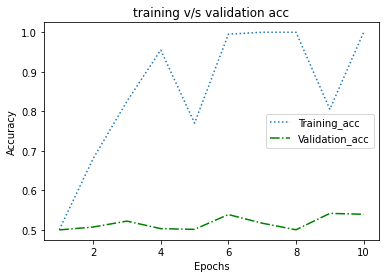

In [38]:
import matplotlib.pyplot as plt

plt.plot(epochs,train_acc,ls=':',label='Training_acc')
plt.plot(epochs,val_acc,ls='-.',color='green',label='Validation_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('training v/s validation acc')
plt.legend()

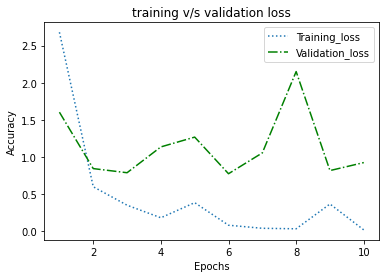

In [39]:
plt.plot(epochs,train_loss,ls=':',label='Training_loss')
plt.plot(epochs,val_loss,ls='-.',color='green',label='Validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('training v/s validation loss')
plt.legend()

**results on test data**

In [46]:
test_dir = os.path.join(path,'test')

texts = []
labels = []
for label_type in ['pos','neg']:
  c=0
  dir_= os.path.join(test_dir,label_type)
  for fname in os.listdir(dir_):
    print(c)
    c+=1
    if fname[-4:]=='.txt':
      f = open(os.path.join(dir_,fname))
      texts.append(f.read())
      f.close()

      if label_type=='pos':
        labels.append(1)
      else:
        labels.append(0)



In [45]:
sequences = tk.texts_to_sequences(texts)
x_test = pad_sequences(sequences,maxlen=100,padding='post')
y_test = np.asarray(labels)
model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.9145 - acc: 0.5412


[0.9145122766494751, 0.5412399768829346]